<a href="https://colab.research.google.com/github/dosacat/Gold-Price-Prediction/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diggers Project
---
## Case Study: Gold Price Prediction.

**Objective:**

In this project, you will explore a dataset of gold prices detailed below. We will build a model to predict the cost of gold based on the prices of various stock indices. 


## Dataset Description

*   **Date**: mm/dd/yyyy
*   **SPX**: The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States.
*   **GLD**: Gold Price (target variable)
*   **USO**: The United States Oil Fund is an exchange-traded fund that attempts to track the price of West Texas Intermediate Light Sweet Crude Oil.
*   **SLV**: Silver Price
*   **EUR/USD**:EUR/USD currency pair represents the euro versus the U.S. dollar. The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars.












## 1. Data Loading

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Upload the dataset and use pandas module (read_csv) function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path_to_data = '/content/drive/My Drive/gld_price_data.csv'

In [ ]:
# read CSV file in Pandas
data = pd.read_csv(Path_to_data)

# display first 10 rows
data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


## 2. Exploratory Data Analysis
Let's dig deeper & understand our data

In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns. \n'.format(rows,columns))


print('This is a summary of the data:')
data.info()

print('\n This is a description of the data:')
#describe numerical columns
data.describe()

There are 2290 rows and 6 columns. 

This is a summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB

 This is a description of the data:


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Plotting distributions of data attributes.

Let us observe the distribution of the price of gold.

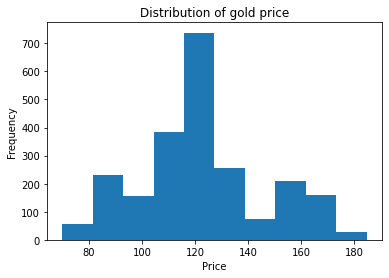

In [ ]:
# plot the histogram of gold price.
data["GLD"].plot(kind="hist")
plt.title("Distribution of gold price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Now, let us observe the distribution of the other attributes.

The distribution of SPX is as follows:


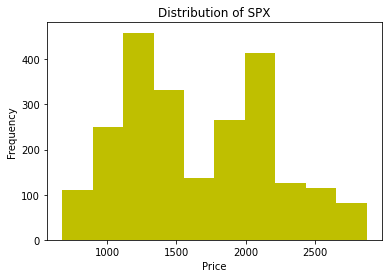



The distribution of USO is as follows:


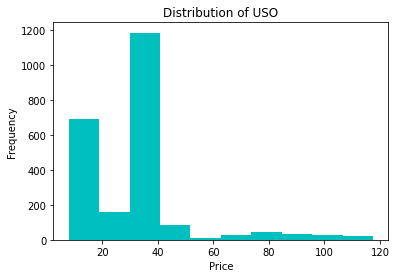



The distribution of SLV is as follows:


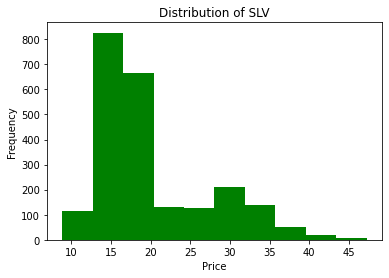



The distribution of EUR/USD is as follows:


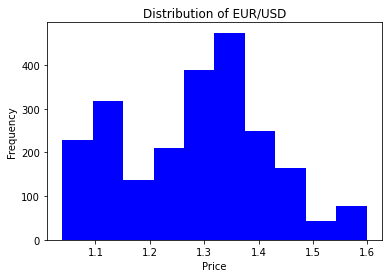

In [ ]:
attributes=["SPX","USO","SLV","EUR/USD"]

#properties to set various colours:
import random
colors = "bgrcmyk"
color_index = 0

for attribute in attributes:
  print("The distribution of {} is as follows:".format(attribute))
  data[attribute].plot(kind="hist",color=colors[random.randint(0,6)])
  plt.title("Distribution of {}".format(attribute))
  plt.xlabel("Price")
  plt.ylabel("Frequency")
  plt.show()
  print("\n")


TAKEWAY:

* From the distributions we notice that the attributes of SPX, EUR/USD and SLV are distributed normally. 
* However, SLO data is skewed to the right with outliers present. 




### Plotting data-correlations.
Let us now plot the correlations of each attribute to the price of gold. 

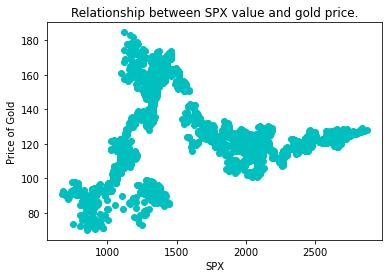

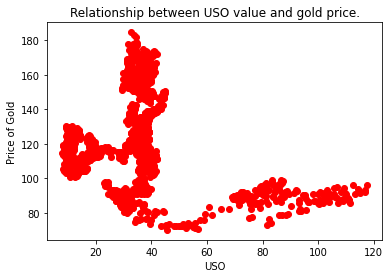

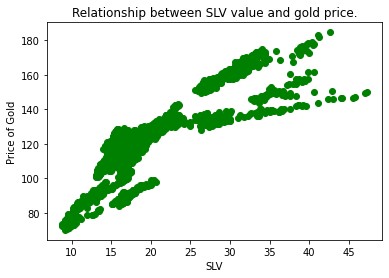

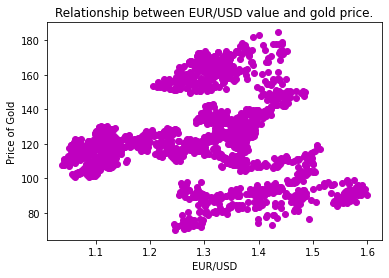

In [ ]:

for attribute in attributes:
  plt.scatter(data[attribute], data["GLD"], color=colors[random.randint(0,6)])
  plt.title("Relationship between {} value and gold price.".format(attribute))
  plt.xlabel(attribute)
  plt.ylabel("Price of Gold")
  plt.show()

TAKEAWAY
 * SLV (silver) progresses linearlly with GLD (gold). 




## 3. Data Preprocessing
 - dealing with missing data
 - removing unused columns
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



In [ ]:
# print how many missing value in each column
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

We have no missing values and therefore no rows will be required to be dropped or replaced. 

### Drop Columns
Let us drop unnecessary columns such as date.

In [ ]:
data.drop("Date", axis=1, inplace=True)
data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


### Normalize Data

Let us normalise values across attributes by dividing it by the max of each column.

In [ ]:
# get the max of each column
data_max = data.max()
data_max

# divide each column by its maximum value
data = data.divide(data_max)
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,0.575841,0.664895,0.271044,0.424989,0.802886
std,0.180694,0.126135,0.166186,0.150075,0.082279
min,0.235489,0.379219,0.067756,0.187262,0.649893
25%,0.431581,0.594425,0.122404,0.329454,0.732621
50%,0.540030,0.653232,0.288304,0.365394,0.815173
75%,0.721582,0.719649,0.321991,0.484183,0.856875
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



### Split the variables:

In [ ]:

Y = np.array(data[['GLD']].copy())
print(X)

[[0.45972156]
 [0.46356792]
 [0.46118424]
 ...
 [0.67815159]
 [0.67441357]
 [0.66387021]]


In [ ]:
X = np.array(data.loc[:, data.columns != 'GLD'])
print(Y)


[[0.45972156]
 [0.46356792]
 [0.46118424]
 ...
 [0.67815159]
 [0.67441357]
 [0.66387021]]


### Define the Keras Model.

In [ ]:
! pip install scikeras

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def create_model():
  # create model
  model = Sequential()
  model.add(Dense(6, input_dim = 4, activation = "relu"))
  # model.add(Dense(6, activation = 'linear'))
  model.add(Dense(1, activation = 'linear'))

  model.compile(loss="mean_squared_error", optimizer="adam")

  return model


# evaluate model
estimator = KerasRegressor(model=create_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Baseline: 0.88 (0.03) MSE


In [ ]:
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim = 4, activation = "relu"))
  # model.add(Dense(6, activation = 'linear'))
  model.add(Dense(1, activation = 'linear'))

  model.compile(loss="mean_squared_error", optimizer="adam")

  return model


# evaluate model
estimator = KerasRegressor(model=create_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: 0.90 (0.02) MSE


In [ ]:
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(6, input_dim = 4, activation = "relu"))
  model.add(Dense(6, activation = 'linear'))
  model.add(Dense(1, activation = 'linear'))

  model.compile(loss="mean_squared_error", optimizer="adam")

  return model


# evaluate model
estimator = KerasRegressor(model=create_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Deeper: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Deeper: 0.89 (0.02) MSE


In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold

# #try splits = 10
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# cvscores = []

# for train, test in kfold.split(X, Y):
# 	accuracy = train_model(X[train], Y[train], X[test], Y[test])
# 	cvscores.append(accuracy)

# print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(6, input_dim = 4, activation = "linear"))
  model.add(Dense(6, activation = 'linear'))
  model.add(Dense(1, activation = 'linear'))

  model.compile(loss="mean_squared_error", optimizer="adam")

  return model


# evaluate model
estimator = KerasRegressor(model=create_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.87 (0.02) MSE
